In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-hieu-new/data_hieu/N/208.jpg
/kaggle/input/data-hieu-new/data_hieu/N/333.jpg
/kaggle/input/data-hieu-new/data_hieu/N/45.jpg
/kaggle/input/data-hieu-new/data_hieu/N/369.jpg
/kaggle/input/data-hieu-new/data_hieu/N/56.jpg
/kaggle/input/data-hieu-new/data_hieu/N/89.jpg
/kaggle/input/data-hieu-new/data_hieu/N/20.jpg
/kaggle/input/data-hieu-new/data_hieu/N/275.jpg
/kaggle/input/data-hieu-new/data_hieu/N/212.jpg
/kaggle/input/data-hieu-new/data_hieu/N/239.jpg
/kaggle/input/data-hieu-new/data_hieu/N/58.jpg
/kaggle/input/data-hieu-new/data_hieu/N/150.jpg
/kaggle/input/data-hieu-new/data_hieu/N/6.jpg
/kaggle/input/data-hieu-new/data_hieu/N/109.jpg
/kaggle/input/data-hieu-new/data_hieu/N/149.jpg
/kaggle/input/data-hieu-new/data_hieu/N/187.jpg
/kaggle/input/data-hieu-new/data_hieu/N/436.jpg
/kaggle/input/data-hieu-new/data_hieu/N/76.jpg
/kaggle/input/data-hieu-new/data_hieu/N/355.jpg
/kaggle/input/data-hieu-new/data_hieu/N/71.jpg
/kaggle/input/data-hieu-new/data_hieu/N/342.jpg
/

In [2]:
train_dir = '/kaggle/input/data-hieu-new/data_hieu'
# test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
val_dir = "/kaggle/input/data-val-duc-v3/data_val_duc_v3"

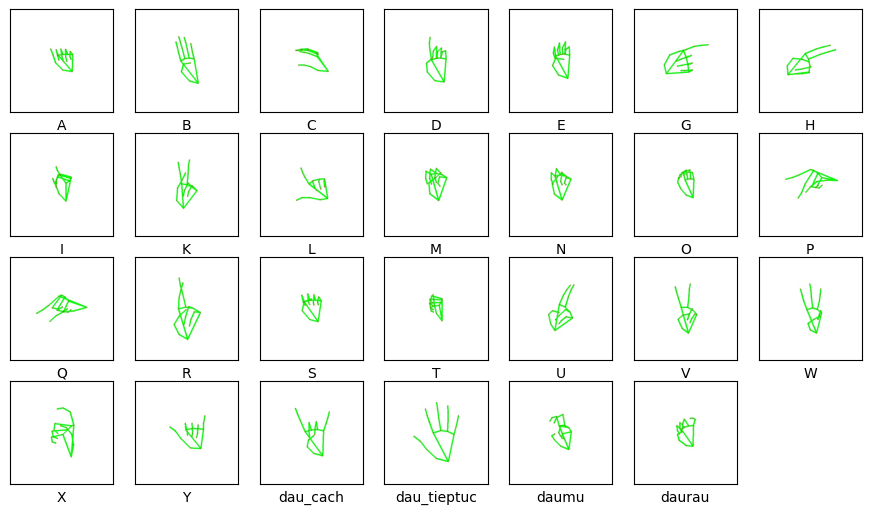

In [3]:
import matplotlib.pyplot as plt
# img_size=(200,200)
classes = ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y' ,'dau_cach', 'dau_tieptuc', 'daumu', 'daurau']
plt.figure(figsize=(11, 11))
for i in range (0,27):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/0.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

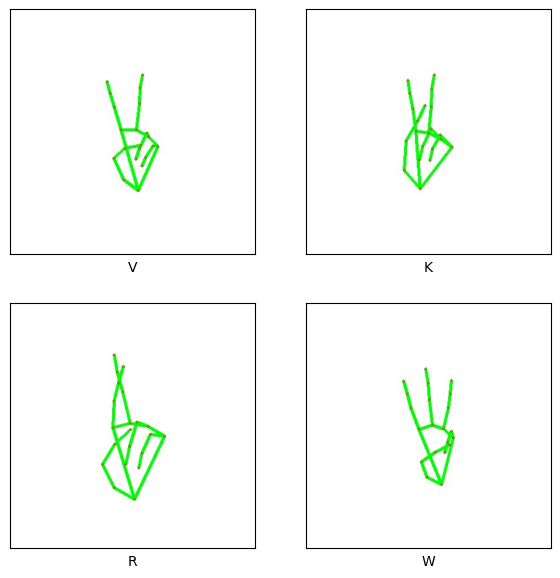

In [4]:
# img_size=(200,200)
classes = ['V', 'K', 'R', 'W']

plt.figure(figsize=(7, 7))

# Hiển thị ảnh trên hàng đầu
for i in range(0, 2):
    plt.subplot(2, 2, i + 1)  # Hàng 1, cột 1 và 2
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/0.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

# Hiển thị ảnh trên hàng dưới
for i in range(2, 4):
    plt.subplot(2, 2, i + 1)  # Hàng 2, cột 1 và 2
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/0.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

plt.show()


In [5]:
import pandas as pd 
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import cv2
import time

import warnings
warnings.filterwarnings("ignore")



from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,Activation, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau

from time import time
from tensorflow.keras import utils

2024-05-19 08:19:58.762984: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 08:19:58.763032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 08:19:58.764507: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
labels_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8,
                'L': 9, 'M': 10, 'N': 11, 'O': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16,
                'T': 17, 'U': 18, 'V': 19, 'W': 20, 'X': 21, 'Y': 22, 'dau_cach': 23,
                'dau_tieptuc': 24, 'daumu': 25, 'daurau': 26}
images = []
labels = []
size = 200,200

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + "/" + folder): 
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        labels.append(labels_dict[folder])
    
images = np.array(images)
images = images.astype('float32')/255.0 
labels = keras.utils.to_categorical(labels) 

In [7]:
val_images = []
val_labels = []

for folder in os.listdir(val_dir): 
    for image in os.listdir(val_dir + "/" + folder):
        temp_img = cv2.imread(val_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        val_images.append(temp_img)
        val_labels.append(labels_dict[folder])

val_images = np.array(val_images)
val_images = val_images.astype('float32') / 255.0  
val_labels = keras.utils.to_categorical(val_labels)  


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2)

print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(X_test),'images for testing','Test data shape =',Y_test.shape)

Loaded 9720 images for training, Train data shape = (9720, 200, 200, 3)
Loaded 2430 images for testing Test data shape = (2430, 27)


In [9]:
# # history = model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_split=0.2, shuffle = True, verbose=1)
# history = model.fit(X_train, Y_train, batch_size=32, epochs=30, validation_data=(val_images, val_labels), shuffle = True, verbose=1)

 # **CNN Model**

In [10]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(200, 200, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=128, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=27, activation='softmax')
    ])
model.summary()

In [11]:
input_shape = (200, 200, 3)
image_input = Input(shape=input_shape)

# Sửa lại đoạn code sử dụng Functional API đúng cách
x = Conv2D(filters=32, kernel_size=(3, 3), padding='valid')(image_input)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dense(units=256, activation='relu', name='dense_1')(x)
x = Dropout(0.5)(x)
out = Dense(units=27, activation='softmax')(x)

model_new = Model(inputs=image_input, outputs=out)
model_new.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 198, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 99, 99, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 97, 97, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 46, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    17,334,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,435,611 (66.51 MB)

 Trainable params: 17,435,163 (66.51 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
optimizer = Adam(learning_rate=0.001)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

model_new.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [13]:
# history = model.fit(X_train,Y_train, batch_size=32, epochs=50, validation_data=(val_images, val_labels),
#                        verbose=2,
#                        callbacks=[reduce_lr])

In [14]:
history = model_new.fit(X_train,Y_train, batch_size=32, epochs=50, validation_data=(val_images, val_labels),
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50


I0000 00:00:1716107222.363834     545 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716107222.383483     545 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716107251.488074     545 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


304/304 - 44s - 145ms/step - accuracy: 0.6965 - loss: 1.5331 - val_accuracy: 0.0370 - val_loss: 75.9652 - learning_rate: 0.0010
Epoch 2/50
304/304 - 13s - 42ms/step - accuracy: 0.9052 - loss: 0.2826 - val_accuracy: 0.0623 - val_loss: 388.0370 - learning_rate: 0.0010
Epoch 3/50
304/304 - 13s - 42ms/step - accuracy: 0.9593 - loss: 0.1571 - val_accuracy: 0.0802 - val_loss: 379.6801 - learning_rate: 0.0010
Epoch 4/50
304/304 - 13s - 43ms/step - accuracy: 0.9778 - loss: 0.1093 - val_accuracy: 0.5623 - val_loss: 8.0278 - learning_rate: 0.0010
Epoch 5/50
304/304 - 13s - 43ms/step - accuracy: 0.9764 - loss: 0.1049 - val_accuracy: 0.4500 - val_loss: 71.8254 - learning_rate: 0.0010
Epoch 6/50
304/304 - 13s - 43ms/step - accuracy: 0.9854 - loss: 0.0939 - val_accuracy: 0.1111 - val_loss: 202.4203 - learning_rate: 0.0010
Epoch 7/50
304/304 - 13s - 43ms/step - accuracy: 0.9807 - loss: 0.1459 - val_accuracy: 0.0370 - val_loss: 1093.7262 - learning_rate: 0.0010
Epoch 8/50
304/304 - 13s - 43ms/step - a

In [16]:
from keras.models import save_model

# Lưu mô hình
save_model(model_new, 'test.h5')

In [17]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['learning_rate']

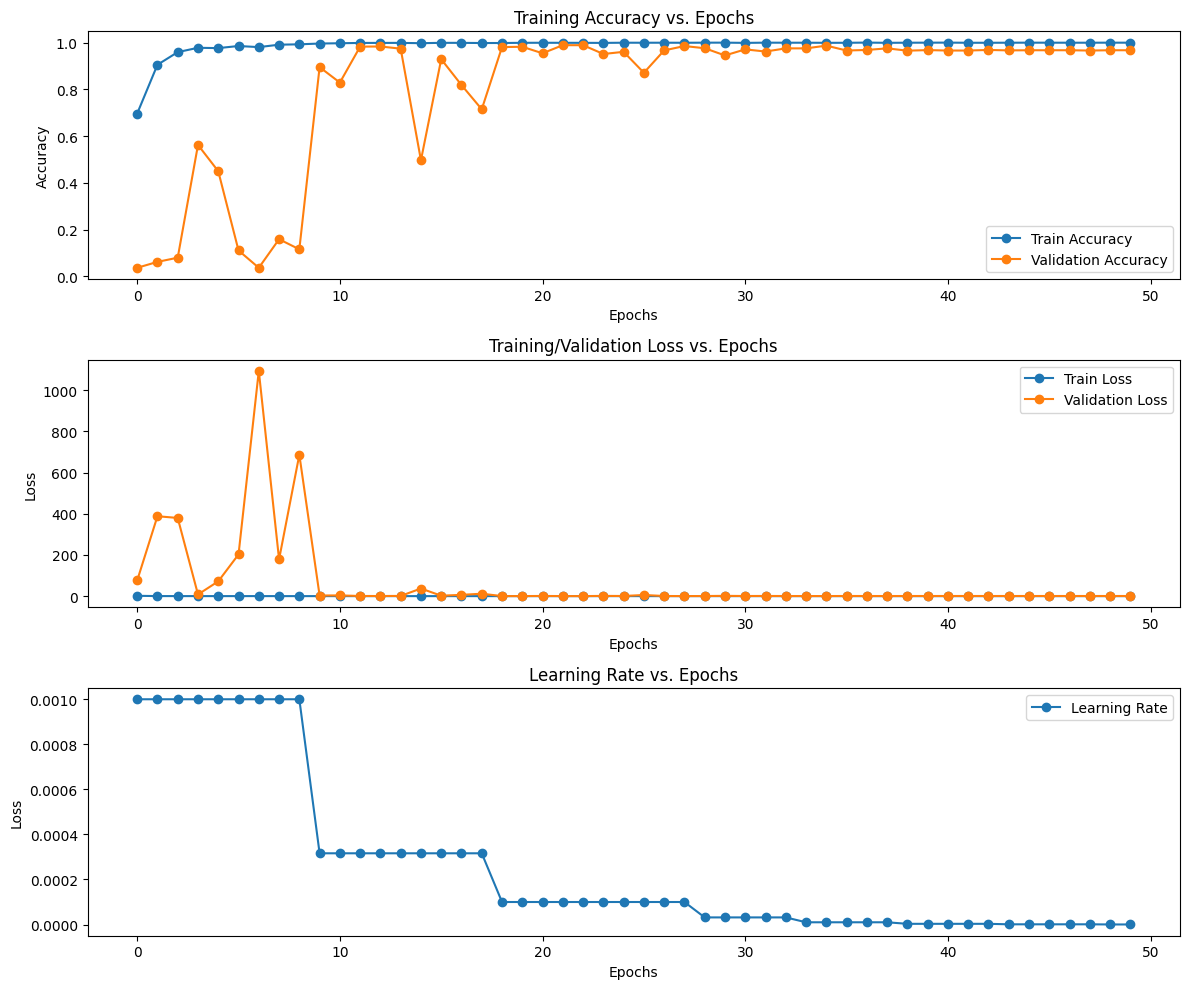

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [23]:
test_loss, test_accuracy = model_new.evaluate(X_test,Y_test)

76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 1.0000 - loss: 0.0070


In [24]:
val_loss, val_acc = model_new.evaluate(val_images, val_labels)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9701 - loss: 0.6755


In [25]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.0069963023997843266
Test Accuracy: 1.0


In [26]:
predictions = model_new.predict(val_images)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(val_labels, axis=1)

19/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

W0000 00:00:1716109087.194848     543 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [ ]:
import seaborn as sns
cf_mtx = confusion_matrix(y_true,y_pred)

class_labels = [f'Class_{i}' for i in range(27)]

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten() / np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]

box_labels = np.asarray(box_labels).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(35, 35))
sns.heatmap(cf_mtx, xticklabels=class_labels, yticklabels=class_labels,
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Tạo báo cáo phân loại
classification_rep = classification_report(y_true, y_pred)

# In báo cáo phân loại
print("Classification Report:\n", classification_rep)

# SVM

In [27]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [30]:
model_feat = Model(inputs=model_new.input,outputs=model_new.layers[-2].output)
# model_feat = Model(inputs=model_new.input, outputs=model_new.get_layer('dense_1').output)
train_features = model_feat.predict(images)
val_features = model_feat.predict(val_images)


train_labels_1d = np.argmax(labels, axis=1)
val_labels_1d = np.argmax(val_labels, axis=1)

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(train_features, train_labels_1d)


predictions = svm_model.predict(val_features)


accuracy = accuracy_score(val_labels_1d, predictions)
print("Accuracy:", accuracy)

380/380 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Accuracy: 0.9543209876543209


In [41]:
path = "/kaggle/input/data-val-duc-v3/data_val_duc_v3/dau_cach/10.jpg"
import numpy as np
from keras.preprocessing import image
from sklearn import svm
from sklearn.metrics import accuracy_score

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

img_path = path
target_size = (200, 200)  
img_array = preprocess_image(img_path, target_size)

model_feat = Model(inputs=model_new.input, outputs=model_new.get_layer('dense_1').output)
new_image_features = model_feat.predict(img_array)


prediction = svm_model.predict(new_image_features)

print("Predicted label:", prediction[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
Predicted label: 23
